## Observations and Insights 

## Data Analysis 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseDF = pd.read_csv(mouse_metadata_path)
resultsDF = pd.read_csv(study_results_path)

In [2]:
# join the data sets
mouse_resultsDF = pd.merge(mouseDF, resultsDF, how="left", on=["Mouse ID", "Mouse ID"])
mouse_resultsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# total_mice
total_mice = len(mouse_resultsDF["Mouse ID"].value_counts())
total_mice

249

In [4]:
# any duplicate_ids for Mouse ID, Timepoint combonation
mouse_cols = ["Mouse ID","Timepoint"]
duplicate_ids = mouse_resultsDF[(mouse_resultsDF.duplicated(mouse_cols) == True)]["Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# all results for duplicate_ids
mouse_resultsDF[mouse_resultsDF["Mouse ID"].isin(duplicate_ids)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# drop all results for duplicate_ids
mouse_resultsDF.drop(mouse_resultsDF[mouse_resultsDF["Mouse ID"].isin(duplicate_ids)].index, inplace=True)
mouse_resultsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# total_mice
total_mice = len(mouse_resultsDF["Mouse ID"].value_counts())
total_mice

248

## Summary Statistics 

In [8]:
# copy to focused dataframe
drug_regimen_tumor_vol = mouse_resultsDF[["Drug Regimen", "Tumor Volume (mm3)"]]

# calculate aggregates
tumor_vol_mean = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_median = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_var = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_std = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_sem = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [9]:
# create new dataframe
drug_regimen_summary = pd.DataFrame({'Mean': tumor_vol_mean, 
                                    'Median': tumor_vol_median,          
                                    'Variance': tumor_vol_var,          
                                    'Standard Deviation': tumor_vol_std,          
                                    'Standard Error of Mean': tumor_vol_sem})
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# display summary from aggregate function
drug_regimen_tumor_vol.groupby(["Drug Regimen"]).aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"].rename(
    columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'Standard Error of Mean'})

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# shape plot data
regimen_timepoints = mouse_resultsDF.groupby(["Drug Regimen"])["Timepoint"].count()

Text(0.5, 1.0, 'Total Number of Measurements Taken for Each Treatment Regimen')

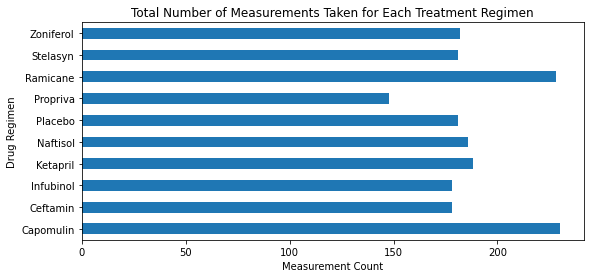

In [12]:
# plot bars using Pandas.
ax = regimen_timepoints.plot(kind='barh', figsize=(9,4))
ax.set_xlabel("Measurement Count")
ax.set_title("Total Number of Measurements Taken for Each Treatment Regimen")

(-0.75, 9.75)

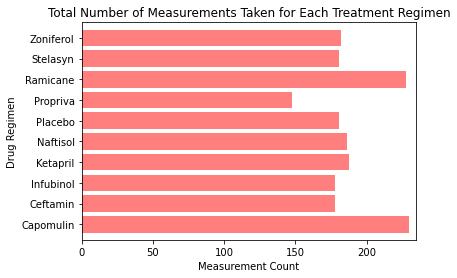

In [13]:
# plot bars using Matplotlib.
measures = regimen_timepoints.values
regimen = regimen_timepoints.index

plt.barh(regimen, measures, color='r', alpha=0.5, align="center")

plt.title("Total Number of Measurements Taken for Each Treatment Regimen")
plt.xlabel("Measurement Count")
plt.ylabel("Drug Regimen")
plt.xlim(0, max(measures) + 5)
plt.ylim(-0.75, len(regimen)-.25)

In [14]:
# shape plot data
mouse_sex = mouse_resultsDF.groupby(["Sex"])["Sex"].count()

measures = mouse_sex.values
sex = mouse_sex.index
total = len(mouse_resultsDF["Sex"])

In [15]:
# label function
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, total * x / 100) # Asahi, D. (2020)

Text(0.5, 1.0, 'Distribution of Male versus Female Mice')

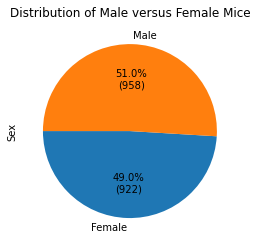

In [16]:
# plot pie chart using Pandas.
ax = mouse_sex.plot(kind='pie', figsize=(9,4), startangle=180, autopct=my_fmt) # Asahi, D. (2020)
ax.set_title("Distribution of Male versus Female Mice")

Text(0, 0.5, 'Sex')

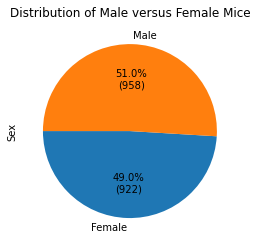

In [17]:
# plot pie chart using Matplotlib.
plt.pie(measures, labels=sex, startangle=180, autopct=my_fmt) # Asahi, D. (2020)
plt.title("Distribution of Male versus Female Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots
✓ Quartiles
✓ IQR
✓ Outlier boundaries
✓ All potential outliers

In [18]:
# get latest mouse data
max_timepoint = mouse_resultsDF.groupby(["Mouse ID"])["Timepoint"].max()
mousefinal_resultsDF = pd.merge(mouse_resultsDF, max_timepoint, how="inner", on=["Mouse ID","Timepoint"])

In [19]:
# collect final volumes for promising regimen
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

for drug in drug_list:
    final_vols = mousefinal_resultsDF.loc[mousefinal_resultsDF["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_vols)
    
    # quartile calculations
    quartiles = final_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"For {drug}:")
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq:.6f}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq:.6f}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr:.6f}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]:.6f}")
    print(f"The lower bound of the data set is: {lower_bound:.6f}")
    print(f"The upper bound of the data set is: {upper_bound:.6f}")
    
    for vol in final_vols:
        if vol > upper_bound or vol < lower_bound:
            print(f"  > The value {vol:.6f} could be and outlier.")
            
    print(f"")


For Capomulin:
The lower quartile of Tumor Volume (mm3) is: 32.377357
The upper quartile of Tumor Volume (mm3) is: 40.159220
The interquartile range of Tumor Volume (mm3) is: 7.781863
The the median of Tumor Volume (mm3) is: 38.125164
The lower bound of the data set is: 20.704562
The upper bound of the data set is: 51.832015

For Ramicane:
The lower quartile of Tumor Volume (mm3) is: 31.560470
The upper quartile of Tumor Volume (mm3) is: 40.659006
The interquartile range of Tumor Volume (mm3) is: 9.098537
The the median of Tumor Volume (mm3) is: 36.561652
The lower bound of the data set is: 17.912664
The upper bound of the data set is: 54.306811

For Infubinol:
The lower quartile of Tumor Volume (mm3) is: 54.048608
The upper quartile of Tumor Volume (mm3) is: 65.525743
The interquartile range of Tumor Volume (mm3) is: 11.477135
The the median of Tumor Volume (mm3) is: 60.165180
The lower bound of the data set is: 36.832905
The upper bound of the data set is: 82.741446
  > The value 36.

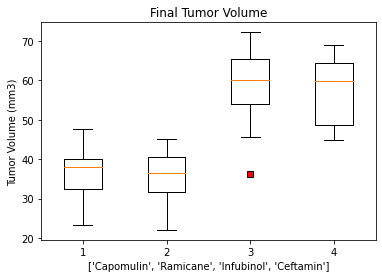

In [20]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel(drug_list)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, flierprops=red_square)
plt.show()

## Line and Scatter Plots

In [21]:
# isolate Capomulin
Capomulin = mouse_resultsDF.loc[(mouse_resultsDF["Drug Regimen"] == "Capomulin") & (mouse_resultsDF["Mouse ID"] == 's185')]
Capomulin.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


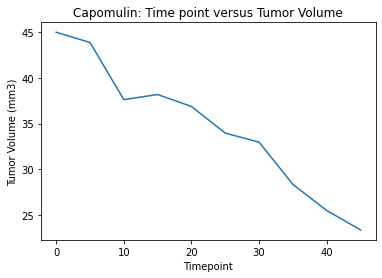

In [22]:
# plot a line graph
plt.plot(Capomulin["Timepoint"], Capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin: Time point versus Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression 

## References
- Asahi, D. (2020, January 8). Matplotlib pie chart: Show both value and percentage. Retrieved January 8, 2022, from https://stackoverflow.com/questions/59644751/matplotlib-pie-chart-show-both-value-and-percentage